https://machineboxio.com/docs/facebox/teaching-facebox -> followed this and posted the Lennon image which is wqhy it is recognised below

In [20]:
import requests
import operator
import os
import io
import base64
import pathlib
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

HEADERS = {'content-type': 'application/json'} ; # charset=utf-8
ENDPOINT = "localhost:8080"
URL = "http://{}/facebox/check".format(ENDPOINT)
print(URL)
IMG_FILE = "thebeatles.jpg"
FIG_SIZE = (18, 12)

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
http://localhost:8080/facebox/check


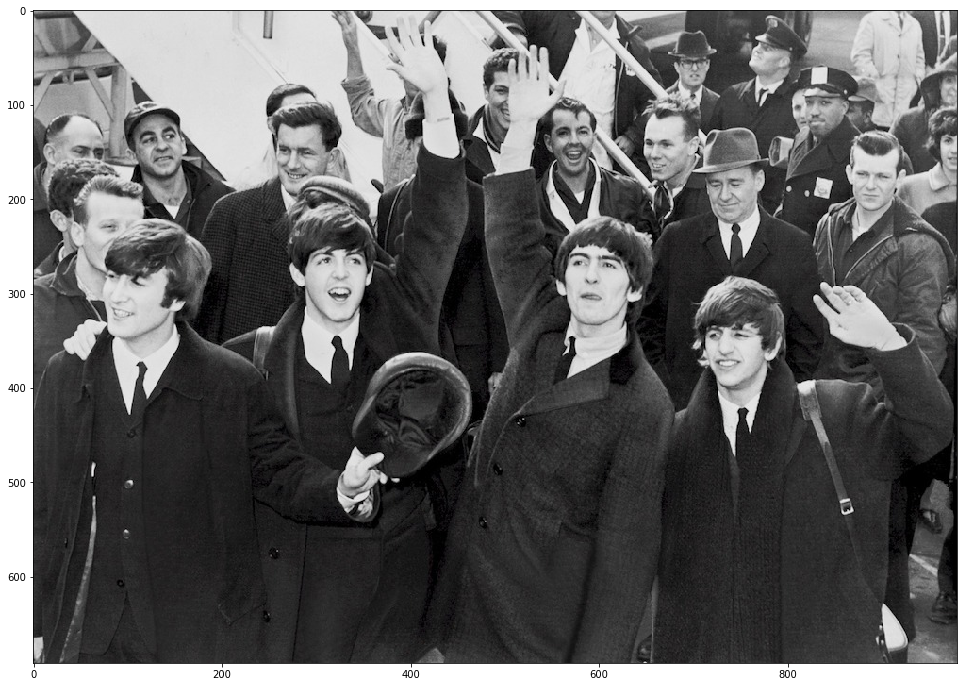

In [21]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [7]:
%%time
files = {
    'file': (IMG_FILE, open(IMG_FILE, 'rb')),
}

response = requests.post(URL, files=files)

CPU times: user 8.87 ms, sys: 6 ms, total: 14.9 ms
Wall time: 4.47 s


In [8]:
print_json(response.json())

{'faces': [{'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 636, 'top': 124, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 62, 'left': 246, 'top': 129, 'width': 62}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 711, 'top': 164, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 106, 'top': 118, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 549, 'top': 118, 'width': 43}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 866, 'top': 166, 'width': 43}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 62, 'left': 563, 'top': 253, 'width': 63}},
           {'confidence': 0,
            'matched': False,
   

In [17]:
bounding_box = {}
for face in response.json()['faces']:
    if face['matched']:
        print_json(face)
        bounding_box = face['rect']

{'confidence': 0.5812028911604818,
 'id': 'john.jpg',
 'matched': True,
 'name': 'John Lennon',
 'rect': {'height': 75, 'left': 63, 'top': 262, 'width': 74}}


Lets plot the bounding box

In [18]:
bounding_box

{'height': 75, 'left': 63, 'top': 262, 'width': 74}

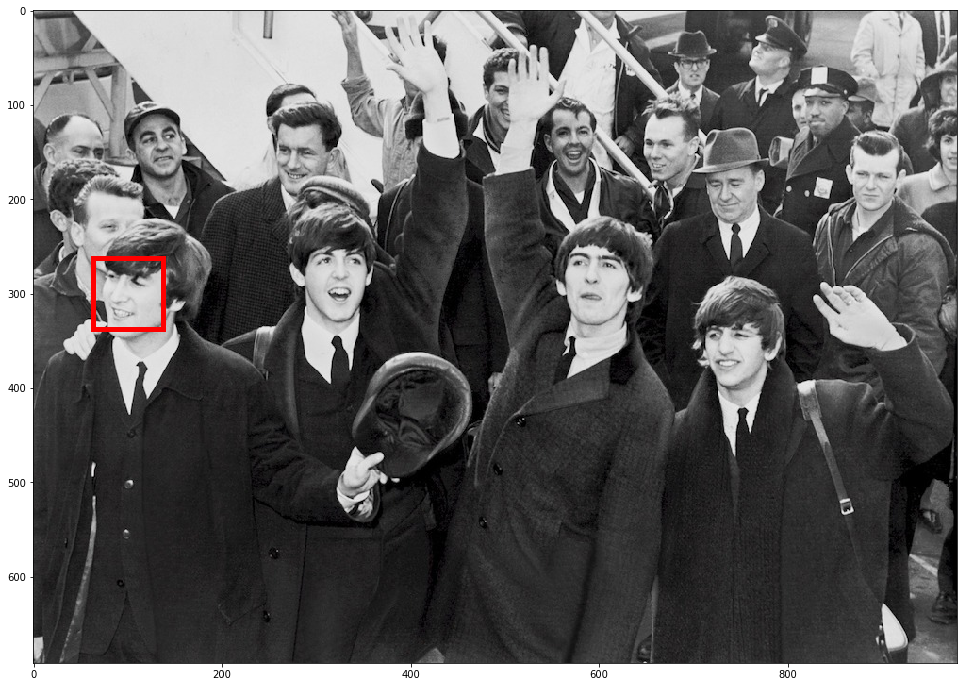

In [23]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

# Get the image rows and cols
img_rows = img.shape[0]
img_cols = img.shape[1]

x = bounding_box['left']
y = bounding_box['top']
width = bounding_box['width']
height = bounding_box['height']

rect = patches.Rectangle((x,y), width, height, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect);